In [3]:
# import heart.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the csv file
df = pd.read_csv('heart.csv')

# Print the first 5 rows of the dataframe.
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


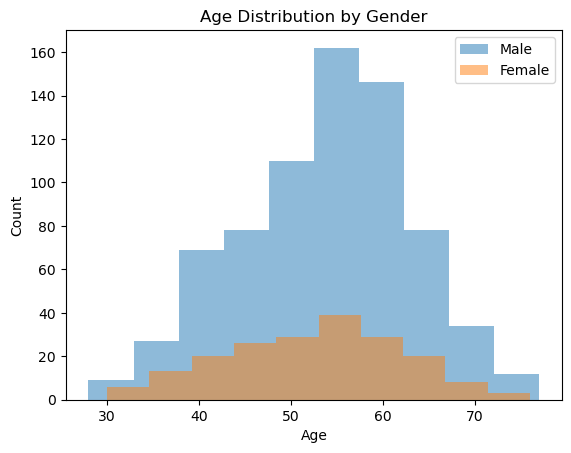

In [4]:
male_data = df[df['Sex'] == 'M']
female_data = df[df['Sex'] == 'F']

plt.hist(male_data['Age'], bins=10, alpha=0.5, label='Male')
plt.hist(female_data['Age'], bins=10, alpha=0.5, label='Female')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')
plt.legend(loc='upper right')

plt.show()

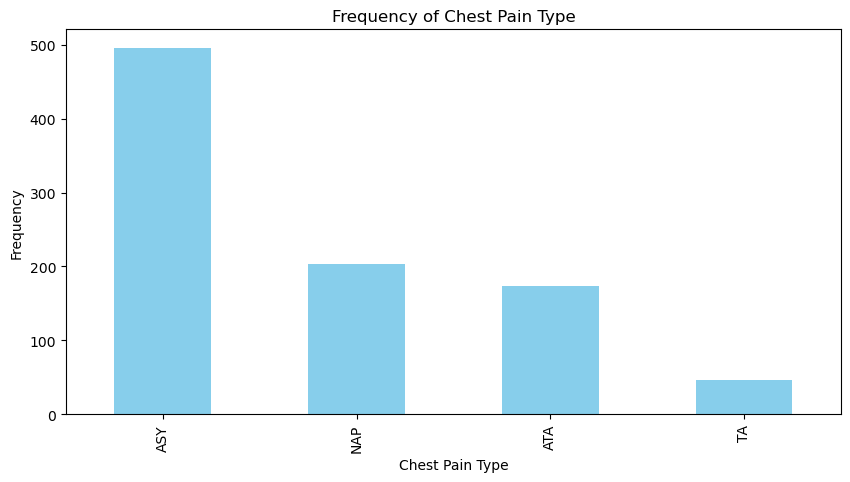

In [5]:
# Plot the categories of chest pain and the frequency of each.
chest_pain_counts = df['ChestPainType'].value_counts()

plt.figure(figsize=(10, 5))
chest_pain_counts.plot(kind='bar', color='skyblue')

plt.title('Frequency of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')

plt.show()

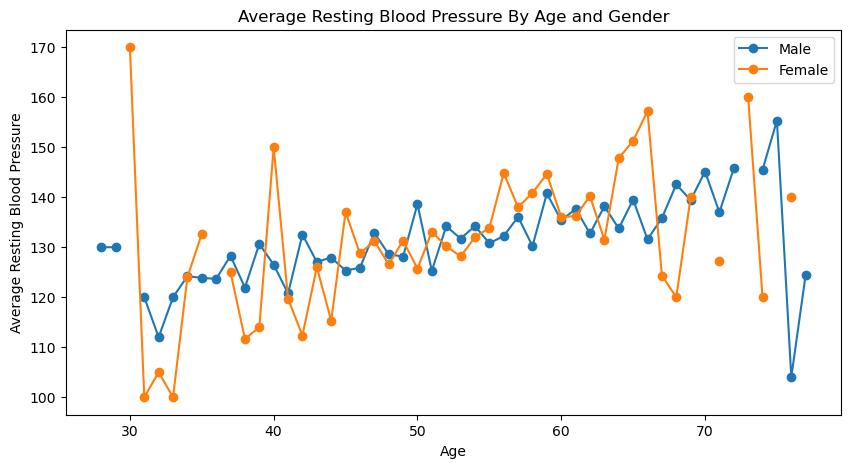

In [6]:
# Plot average blood pressure for each age divided into gender
average_blood_pressure = df.groupby(['Age', 'Sex'])['RestingBP'].mean().unstack()

plt.figure(figsize=(10, 5))
average_blood_pressure['M'].plot(label='Male', marker='o')
average_blood_pressure['F'].plot(label='Female', marker='o')

plt.title('Average Resting Blood Pressure By Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Resting Blood Pressure')
plt.legend()

plt.show()

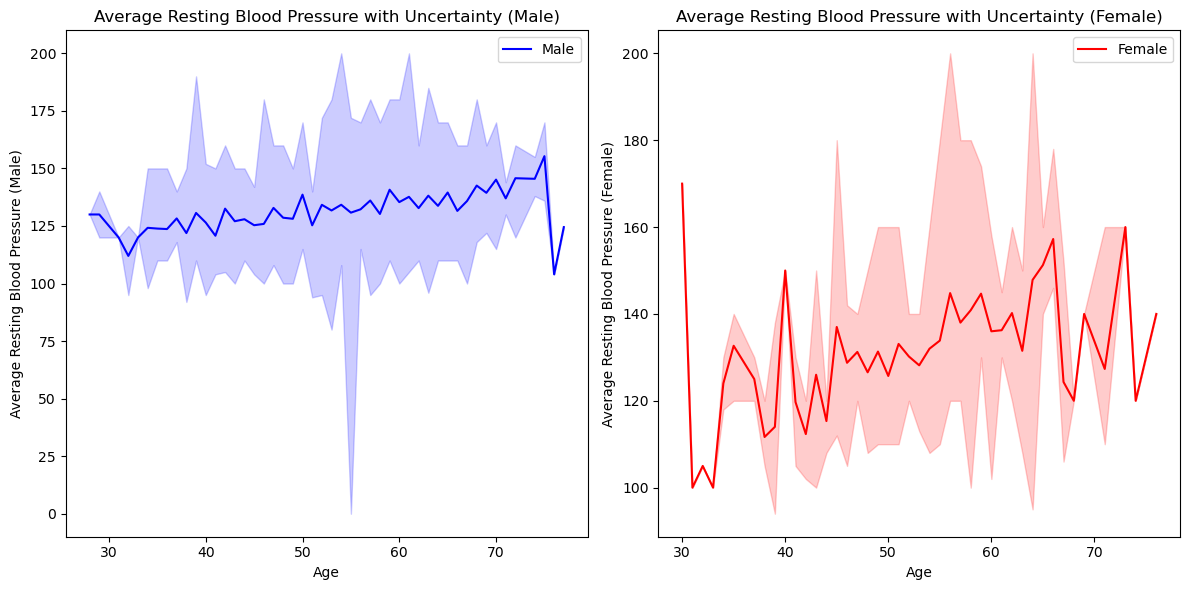

In [7]:

# Group the data by 'Age' and 'Sex' and calculate the mean, min, and max resting blood pressure
grouped_data = df.groupby(['Age', 'Sex'])['RestingBP'].agg(['mean', 'min', 'max']).reset_index()

# Create individual line charts for males and females
plt.figure(figsize=(12, 6))

# Plot the average resting blood pressure for males with error bands
plt.subplot(1, 2, 1)
male_data = grouped_data[grouped_data['Sex'] == 'M']
plt.plot(male_data['Age'], male_data['mean'], label='Male', color='blue')
plt.fill_between(male_data['Age'], male_data['min'], male_data['max'], alpha=0.2, color='blue')
plt.xlabel('Age')
plt.ylabel('Average Resting Blood Pressure (Male)')
plt.title('Average Resting Blood Pressure with Uncertainty (Male)')
plt.legend()

# Plot the average resting blood pressure for females with error bands
plt.subplot(1, 2, 2)
female_data = grouped_data[grouped_data['Sex'] == 'F']
plt.plot(female_data['Age'], female_data['mean'], label='Female', color='red')
plt.fill_between(female_data['Age'], female_data['min'], female_data['max'], alpha=0.2, color='red')
plt.xlabel('Age')
plt.ylabel('Average Resting Blood Pressure (Female)')
plt.title('Average Resting Blood Pressure with Uncertainty (Female)')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

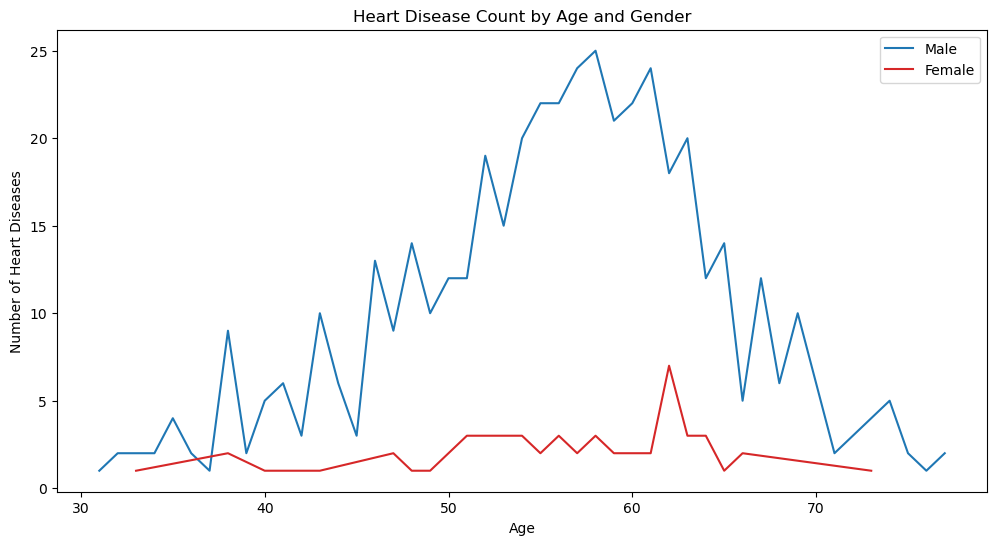

In [8]:
# Filter the data to include only records with heart disease
heart_disease_data = df[df['HeartDisease'] == 1]

# Create line graphs for males and females
plt.figure(figsize=(12, 6))

# Line graph for males
male_data = heart_disease_data[heart_disease_data['Sex'] == 'M']
male_heart_disease_counts = male_data.groupby('Age')['HeartDisease'].count()
plt.plot(male_heart_disease_counts.index, male_heart_disease_counts.values, label='Male', color='tab:blue')

# Line graph for females
female_data = heart_disease_data[heart_disease_data['Sex'] == 'F']
female_heart_disease_counts = female_data.groupby('Age')['HeartDisease'].count()
plt.plot(female_heart_disease_counts.index, female_heart_disease_counts.values, label='Female', color='tab:red')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Number of Heart Diseases')
plt.title('Heart Disease Count by Age and Gender')
plt.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Cholesterol Levels by Age')

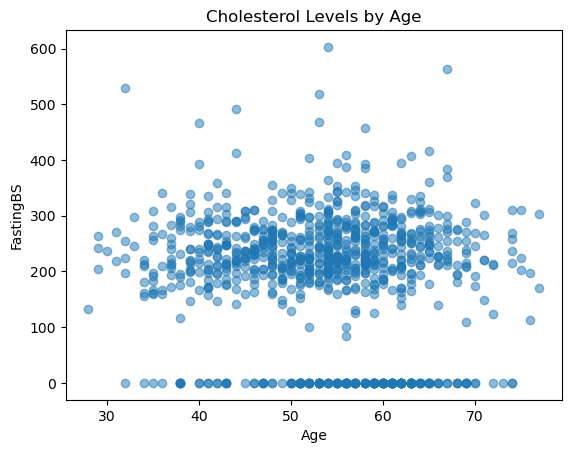

In [12]:
# Plot each entries with age on the x-axis and cholesterol on the y-axis
plt.scatter(df['Age'], df['Cholesterol'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('FastingBS')
plt.title('Cholesterol Levels by Age')